<a id="top"></a>
<h1>We Rate Dogs Data Wrangling Project</h1>
<p>This project represents a student example of completing an analysis with emphasis on the data wrangling step. Rather than completing a tandem data wrangling and exploratory data analysis, data wrangling is completed as a an important step to illustrate understanding and mastery.</p>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Table of Contents</h2>
    <ul>
        <li><a href="#project-details">Project Details</a></li>
        <li><a href="#gather">Gathering Data</a></li>
        <ul>
            <li><a href="#gather-step-1">Step 1: Read in File 1 (.csv file)</a></li>
            <li><a href="#gather-step-2">Step 2: Read in File 2 (.tsv file from the web)</a></li>
            <li><a href="#gather-step-3">Step 3: Read in File 3 (.json file)</a></li>
        </ul>
        <li><a href="#assess">Assessing Data</a></li>
        <ul>
            <li><a href="#tidiness">Tidiness Issues</a></li>
            <li><a href="#explore-quality">Exploring Quality Issues</a></li>
            <ul>
                <li><a href="#archive-quality-1">Archive Data Set Step 1: Search for Missing Data Points</a></li>
                <li><a href="#archive-quality-2">Archive Data Set Step 2: Search for Duplicates</a></li>
                <li><a href="#predictions-quality-1">Predictions Data Set Step 1: Search for Missing Data Points</a></li>
                <li><a href="#predictions-quality-2">Predictions Data Set Step 2: Search for Duplicates</a></li>
                <li><a href="#predictions-quality-3">Predictions Data Set Step 3: Search for Incorrect Data</a></li>
                <li><a href="#missing-quality-1">Mising Data Set Step 1: Search for Missing Data Points</a></li>
                <li><a href="#missing-quality-2">Mising Data Set Step 2: Search for Duplicates</a></li>
                <li><a href="#missing-quality-3">Mising Data Set Step 3: Search for Incorrect Data</a></li>
            </ul>
            <li><a href="#quality">Data Quality Issues</a></li>
        </ul>
        <li><a href="#clean">Cleaning Data</a></li>
        <ul>
            <li><a href="#clean-step-1">1. Remove records where archive['retweet_status_id'] is not null</a></li>
            <li><a href="#clean-step-2">2. Remove the records where archive['in_reply_to_status_id'] is not null</a></li>
            <li><a href="#clean-step-3">3. Update the data type of archive['timestamp'] to datetime</a></li>
            <li><a href="#clean-step-4">5. Remove the missing['place'] column</a></li>
            <li><a href="#clean-step-5">8. Update the missing['lang'] column values to human readable values</a></li>
            <li><a href="#clean-step-6">6. Correct the missing['retweeted'] where missing['retweet_count'] > 0 values to True</a></li>
            <li><a href="#clean-step-7">7. Correct the missing['favorited'] where missing['favorite_count'] > 0 values to True</a></li>
            <li><a href="#clean-step-8">4. Remove the records from predictions where none of the prediction values are a dog</a></li>
            <li><a href="#clean-step-9">1. Combine all three DataFrames into one DataFrame</a></li>
            <li><a href="#clean-step-10">2. Create a dog_stage column and unpivot the doggo, floofer, pupper, and puppo columns into this new column.</a></li>
        </ul>
        <li><a href="#store">Storing, Analyzing, and Visualizing Data</a></li>
        <ul>
            <li><a href="#store-step-1">Storing the Data to .csv File</a></li>
            <li><a href="#store-step-2">Analyzing the Data</a></li>
            <ul>
                <li><a href="#explore-1">Exploration: Do people prefer younger dogs over older dogs?</a></li>
                <li><a href="#explore-2">Exploration: Which dog breed was retweeted the most?</a></li>
                <li><a href="#explore-3">Exploration: Which language users have the highest rating?</a></li>
                <li><a href="#explore-4">Exploration: Which dog breeds were eaisest for the AI to identify?</a></li>
            </ul>
            <li><a href="#store-step-3">Telling the Data Story with Visualizations</a></li>
        </ul>
        <li><a href="#conclusion">Project Wrap Up</a></li>
    </ul>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="project-details"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Project Details</h2>
    <h3>Udacity Step Objectives:</h3>   
    <ul>
        <li>Data wrangling, which consists of:</li>
        <ul>
            <li>Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below)</li>
            <li>Assessing data</li>
            <li>Cleaning data</li>
        </ul>
        <li>Storing, analyzing, and visualizing your wrangled data</li>
        <li>Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations</li>
    </ul>
    <h3>Student Comments:</h3>
    <p>The team at Udacity has provided a data set across a few different data sources from the Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>. This tweet inforamtion includes tweets that have since been archived from the beginning of their activity until August 1, 2017. The We Rate Dogs team rates people's dog's and provides a comment about them using a rating system that is unique to their fanbase. They also give dogs a category which they define as a stage based on the age of the dog and/or other characteristics of the dog.</p>
    <p>For this project I will focus primarily on the data wrangling process but a short analysis is also provided.</p>
</div>

In [176]:
# import typical python libraries
import pandas as pd
import numpy as np
%matplotlib inline 

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id='gather'></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Gathering Data</h2>
    <h3>Udacity Step Objectives:</h3>
    <p>Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:</p>
    <p>The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv</p>
    <p>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</p>
    <p>Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.</p>
    <p>If you decide to complete your project in the Project Workspace, note that you can upload files to the Jupyter Notebook Workspace by clicking the "Upload" button in the top righthand corner of the dashboard.</p>
    <h3>Student Comments:</h3>
    <p>Per the requirements of the project data is being gathered from 3 different locations</p>
    <ul style='margin:0;'>
        <li>A previously prepared .csv file with the We Rate Dogs twitter archive information</li>
        <li>An image predictions .tsv file hosted on the Udacity website</li>
        <li>Additional tweet information to be pulled from the Twitter API using Tweepy</li>
        <ul>
            <li>As a side note the info can't be pulled from the Twitter API as pulling full archive data is only available to users with a paid premium or enterprise account.</li>
            <li>In lieu of grabbing the data using Tweepy I will instead illustrate my understading of using said API but use the tweet-json.txt file provided by Udacity</li>
        </ul>
    </ul>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="gather-step-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px; margin-bottom: 15px;">
    <p><strong>Step 1: Read in File 1 (.csv file)</strong></p>
</div>

In [177]:
archive = pd.read_csv('twitter-archive-enhanced-2.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="gather-step-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Step 2: Read in File 2 (.tsv file from the web)</strong></p>
</div>

In [179]:
# import required requests & io libraries to read on the .tsv file from a website
import requests
import io

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url).content
predictions = pd.read_csv(io.StringIO(response.decode('utf-8')), sep = '\t')
predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="gather-step-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Step 3: Read in File 3 (.json file)</strong></p>
    <p>The json file should be read in using Tweepy but recently Twitter has updated their account types and only users with a premium developer account can access historical tweets. Since I have a standard premium account I will illustrate that I know how to use Tweepy but use the file provided by Udacity to read in the .json file.</p>
</div>

In [242]:
# import the tweepy library
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler('*', '*')
auth.set_access_token('*', '*')

# Create an API object
api = tweepy.API(auth, wait_on_rate_limit = True,
    wait_on_rate_limit_notify = True)

# Double check successfull authentication
try:
    api.verify_credentials()
    print("Authentication OK", end = '\n\n')
except:
    print("Error during authentication")
    

# Get some We Rate Dogs Tweets
statuses = api.user_timeline('dog_rates', count = 3)
for status in statuses: 
    print(status.text, end = '\n\n') 

Authentication OK

RT @GoodNewsCorres1: The McKay family was reunited with their dog Fergus after he’d gone missing on Saturday after a car rear-ended their c…

@BookofJonah taken care of

This is Koda. She was hit by a car last week. Had some internal bleeding, but is doing much better now. Only a litt… https://t.co/YO0EZUNJ8x



In [181]:
extra = pd.read_json('tweet-json.txt', lines = True)
extra.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [182]:
# Make a copy of the json data with only the columns we're interested in
missing = extra.filter(['id', 'retweet_count', 'retweeted', 'favorite_count', 'favorited', 'lang', 'place'], axis = 1)
missing.head(1)

,id,retweet_count,retweeted,favorite_count,favorited,lang,place
0,892420643555336193,8853,False,39467,False,en,None


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="assess"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Assessing Data</h2>
    <p>Now that the data is gathered it needs to be assessed and documented for issues.</p>
    <h3>Udacity Step Objectives:</h3>
    <p>After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.</p>
    <h3>Student Comments:</h3>
    <p>Let's define the issues:</p>
    <ul style='list-style-type: none; margin:0'>
        <li><a href='#tidiness'>Tidiness Issues</a></li>
        <li><a href='#quality'>Quality Issues</a></li>
    </ul>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="tidiness"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Tidiness Issues</h2>
    <p>The following tidiness issues have been observed during the <a href="#gather">Data Gathering</a> process above:</p>
    <ul>
        <li>The most blaring tidiness issue is the fact that the data is spread across 3 tables.</li>
        <ul>
            <li>According to tidiness rules <em>each observational unit forms a table</em>.</li>
            <li>There really isn't much data here and we're observing tweets.</li>
            <li>The data in each of the sources provided are all pieces of information about a particular tweet.</li>
            <li>Even the prediction is technically a piece of info about the tweet; i.e. the breed of dog who is the star of the tweet - the tweet's subject.</li>
        </ul>
        <li>Another tidiness issue that was observed while gathering the data is that the dog stage is spread across 3 columns.</li>
        <ul>
            <li>According to tidiness rules <em>each variable forms a column</em>.</li>
            <li>The four dog stages were observed as being their own column headers.</li>
        </ul>
    </ul>
    <div>
    <h3>Tidiness Clean Up Recommendations</h3>
    <ol>
        <li><a href="#clean-step-9">Combine all three DataFrames into one DataFrame</a></li>
        <li><a href="#clean-step-10">Create a <em>dog_stage</em> column and unpivot the <em>doggo</em>, <em>floofer</em>, <em>pupper</em>, and <em>puppo</em> columns into this new column</a></li>
    </ol>
    </div>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="explore-quality"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Exploring Quality Issues</h2>
    <p>Let's start exploring the data for possible quality issues in order to identify any quality issues. Data quality exploration will focus on identifying missing data, removing duplicates, data type mismatches, and correcting or removing incorrect information.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="archive-quality-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Archive Data Set Step 1: Search for Missing Data Points</strong></p>
</div>

In [183]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Archive has 2356 rows but some of the columns are showing less than 2356 non null values. The rows that are of interest are tweet_id, timestamp, maybe source, rating_numerator, rating_denominator, name, doggo, floofer, pupper, and puppo. Each of these columns has 2356 values so no need to drop values yet.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="archive-quality-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Archive Data Set Step 2: Search for Duplicates</strong></p>
</div>

In [184]:
sum(archive.duplicated())

0

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>    
    <p>There aren't any duplicates but in previous analysis I've done I've noted that sometimes the same <em>observational unit</em> is represented with multiple records with distinct ID values. Even though there don't appear to be any duplicates we should reduce the observational units down to the minimum distinct columns that define them to really search for duplicates. Let's look for duplicates by reducing the number of columns to review.</p>
</div>

In [185]:
archive2 = archive.filter(['timestamp', 'source', 'text', 'name'], axis = 1)
sum(archive2.duplicated())

0

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>OK so there really aren't any duplicates. In this case let's see how many unique values each column has and see if we notice anything off.</p>
</div>

In [186]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It looks like the expanded_urls column only has 2218 unique values but there were a total of 2297 expanded_url entries? What is the expanded_url? I thought it was the url where the tweet is located - so does that mean these are retweets?</p>
    <p>And upon further investigation on the internet I've found that retweet's can be identified with the retweet_status. If they have a retweet_status they are a retweet and if they don't they are not <a href="https://stackoverflow.com/questions/18869688/twitter-api-check-if-a-tweet-is-a-retweet#:~:text=9%20Answers&text=If%20it's%20a%20retweet%2C%20the,More%20info%20at%3A%20Tweets">(Stack Overflow)</a>. For sure we'll need to drop the retweets, i.e., the items with a retweet_status_id and there are 181 of them that need to be <strong>removed</strong>.</p>
    <p>In the same vein if realizing that a retweet_status_id means it's a retweet, the in_reply_to_status_id must mean that the tweet is a reply. Technically speaking a reply isn't the original tweet that we want to review and these can also be <strong>removed</strong>.</p>
</div>

In [187]:
eurl = archive['expanded_urls']
archive[eurl.isin(eurl[eurl.duplicated()])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Some of them are retweets but some of them have NAN as the value which means they are null. Since we we aren't concentrating on expanded_url as a value of interest the NAN's don't matter as long as the columns of interest don't have NAN as a value.</p>
    <p>I think this is a good start for now on the archive information and we may find later that we need to iterate over this step after a little combining and cleaning. But before wrapping up let's notate any <strong>data type</strong> issues:</p>
    <ul style="margin:0">
        <li>timestamp is an object and should be a datetime</li>
    </ul>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="predictions-quality-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Predictions Data Set Step 1: Search for Missing Data Points</strong></p>
</div>

In [188]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="predictions-quality-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Predictions Data Set Step 2: Search for Duplicates</strong></p>
</div>

In [189]:
sum(predictions.duplicated())

0

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>This data set is pretty much already paired down to the minimum distinct columns needed to define the observation type so there's no need to go further to look for duplicates. Since there doesn't appear to be any missing data or duplicate data I'll take a look at a sampling of data to see if I see anything of note.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="predictions-quality-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Predictions Data Set Step 3: Search for Incorrect Data</strong></p>
</div>

In [190]:
predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,4.125930e-02,False,beach_wagon,1.540050e-02,False
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,6.806610e-02,True,borzoi,4.507120e-02,True
1425,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,Pembroke,0.367945,True,Chihuahua,2.235220e-01,True,Pekinese,1.648710e-01,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,2.045440e-01,True,black-and-tan_coonhound,7.860190e-02,True
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,1.834700e-01,True,German_shepherd,7.966190e-02,True
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,4.065500e-01,True,cocker_spaniel,4.148440e-02,True
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,1.317530e-01,False,wreck,9.559670e-02,False
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,6.936170e-02,False,keeshond,5.052760e-02,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,1.905030e-01,True,curly-coated_retriever,1.464270e-01,True


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="strategy"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>The Predictions data set doesn't have any <strong>duplicates</strong> and doesn't appear to have any <strong>missing data</strong>. Also all the <strong>data types</strong> look to be correct.  The issue here is that some of the items aren't dogs. I see some items up here that returned pencil_box, suit, and tub for example. These things aren't dogs. The items that aren't dogs are going to need to be eliminated but i wonder how to figure that out?</p>
    <p>Based on the columns available the strategy I want to go with is as follows:</p>
    <ul>
        <li>Use the <em>pX_dog</em> column to decipher if the prediction is in fact a dog</li>
        <li>If all 3 predictions for any given record are all False eliminate it</li>
        <li>Use the <em>pX_conf</em> column to figure out which predicition has the highest confidence rating</li>
        <li>Use the highest value that has a <em>pX_dog</em> value of True as the final dog breed prediction</li>
    </ul>
    <p>From the onset of this project we were given the dog breed prediction data and don't have access to the AI that was used to create it. Even though I can click on these links and look at the photos myself the only way to fix any incorrect data on this set is to follow through with hours of manual tedium which isn't particularly the point of this project. So rather than correcting incorrect data here, I'll just drop those records that don't meet the requirement of being a dog.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="missing-quality-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Missing Data Set Step 1: Search for Missing Data Points</strong></p>
</div>

In [191]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   retweeted       2354 non-null   bool  
 3   favorite_count  2354 non-null   int64 
 4   favorited       2354 non-null   bool  
 5   lang            2354 non-null   object
 6   place           1 non-null      object
dtypes: bool(2), int64(3), object(2)
memory usage: 96.7+ KB


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Even though it's technically a cleaning task, the ID column in this data set isn't properly labeled so I'll start by fixing that. The other 2 data sets ID column is labeled <em>tweet_id</em> and this data set should get in line in order to make it easier to merge the 3 data sets during the cleaning process.</p>
</div>

In [271]:
missing.rename(columns = {'id': 'tweet_id'}, inplace = True)
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   retweeted       2354 non-null   bool  
 3   favorite_count  2354 non-null   int64 
 4   favorited       2354 non-null   bool  
 5   lang            2354 non-null   object
dtypes: bool(2), int64(3), object(1)
memory usage: 78.3+ KB


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>I can already see that there are no <strong>missing data</strong> and also that there aren't any incorrect <strong>data types</strong>.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="missing-quality-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Missing Data Set Step 2: Search for Duplicates</strong></p>
</div>

In [194]:
missing['tweet_id'].nunique()

2354

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>There aren't any duplicates.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="missing-quality-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Missing Data Set Step 3: Search for Incorrect Data</strong></p>
</div>

In [195]:
missing.sample(20)

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,place
2351,666033412701032449,47,False,128,False,en,None
999,747933425676525569,2894,False,7310,False,en,None
1208,715680795826982913,1813,False,4719,False,en,None
1575,687399393394311168,702,False,2081,False,en,None
1840,675870721063669760,632,False,1783,False,en,None
1193,717421804990701568,945,False,3446,False,en,None
2322,666421158376562688,118,False,327,False,en,None
1332,705428427625635840,1931,False,4188,False,en,None
2258,667550882905632768,34,False,0,False,ro,None
481,815390420867969024,4407,False,11467,False,en,None


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Looking at a sampling of the data this <em>place</em> column looks useless actually. Let's hone in to get a better idea.</p>
</div>

In [196]:
missing[missing['place'].isnull()] 

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,place
0,892420643555336193,8853,False,39467,False,en,None
1,892177421306343426,6514,False,33819,False,en,None
2,891815181378084864,4328,False,25461,False,en,None
3,891689557279858688,8964,False,42908,False,en,None
4,891327558926688256,9774,False,41048,False,en,None
...,...,...,...,...,...,...,...
2349,666049248165822465,41,False,111,False,en,None
2350,666044226329800704,147,False,311,False,en,None
2351,666033412701032449,47,False,128,False,en,None
2352,666029285002620928,48,False,132,False,en,None


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Most of the records don't actually have place data so we can <strong>remove</strong> this column. The most important columns from this dataframe are retweet_count and favorite_count so let's make sure all the data is there.</p>
</div>

In [197]:
missing[missing['retweet_count'].isnull()]

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,place


In [198]:
missing[missing['favorite_count'].isnull()]

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,place


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Neither of these columns is missing data, but the retweeted and favorited column appear to have incorrect data in them. How can you have a retweet_count but the retweeted value be False? The same is true for the favorited column. Unless the corresponding count is 0 that value should really be True. I suppose technically speaking we don't really need either one of those columns and could remove them, but if we wanted to get a general count of how many records were retweeted vs how many weren't and/or how many were favorited vs how many weren't this value would/should be accurate. In that case, maybe we should just <strong>correct</strong> this incorrect data.</p>
    <p>Let's also see if the language column is of value. If all the values are en (English) then it's really not worth having.</p>
</div>

In [199]:
missing['lang'].nunique()

9

In [200]:
missing['lang'].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It looks like there are 9 values represented here but not quite sure what they all mean. Most likely they are html lang values. It would be helpful to translate these into their actual language value if possible so perhaps we should <strong>add</strong> a column with human readable language values.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="quality"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Data Quality Issues</h2>
    <p>The following data quality issues were revealed:</p>
    <ul>
        <li>The archive dataframe has retweets that need to be removed.</li>
        <li>The archive dataframe has replys that need to be removed.</li>
        <li>The timestamp column in the archive data frame is the wrong data type.</li>
        <li>The predictions dataframe has items in it that are some other object other than a dog.</li>
        <li>The missing dataframe place column doesn't have any useful information in it.</li>
        <li>The missing dataframe retweeted column has incorrect values in it.</li>
        <li>The missing dataframe favorited column has incorrect values in it.</li>
        <li>The lang column values aren't particularly human readable so I can't tell if they are correct or not.</li>
    </ul>
    <h3>Data Quality Clean Up Recommendations</h3>
    <ol>
        <li><a href="#clean-step-1">Remove the records where archive['retweeted_status_id'] is not null</a></li>
        <li><a href="#clean-step-2">Remove the records where archive['in_reply_to_status_id'] is not null</a></li>
        <li><a href="#clean-step-3">Update the data type of archive['timestamp'] to datetime</a></li>
        <li><a href="#clean-step-8">Remove the records from predictions where none of the prediction values are a dog</a></li>
        <li><a href="#clean-step-4">Remove the missing['place'] column</a></li>
        <li><a href="#clean-step-6">Correct the missing['retweeted'] where missing['retweet_count'] > 0 values to True</a></li>
        <li><a href="#clean-step-7">Correct the missing['favorited'] where missing['favorite_count'] > 0 values to True</a></li>
        <li><a href="#clean-step-5">Update the missing['lang'] column values to human readable values</a></li>
    </ol>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Cleaning Data</h2>
    <h3>Udacity step objectives:</h3>
    <p>Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.</p>
    <h3>Student Comments:</h3>
    <p>In order to get this dataset cleaned up we'll start with the quality issues then tackle the tidiness issues.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>1. Remove records where archive['retweet_status_id'] is not null</h2>
    <p>Rather than dropping these values from the dataset we can actually create a new dataset without them.</p>
</div>

In [201]:
archive3 = archive[archive['retweeted_status_id'].isna()]
archive3['retweeted_status_id'].isnull().sum()

2175

In [202]:
archive3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>retweet_status_id</em> column now has 0 records.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>2. Remove the records where archive['in_reply_to_status_id'] is not null</h2>
    <p>Again we'll create a new dataframe and just exclude those values.</p>
</div>

In [203]:
archive4 = archive3[archive3['in_reply_to_status_id'].isna()]
archive4['in_reply_to_status_id'].isnull().sum()

2097

In [204]:
archive4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>in_reply_to_status_id</em> column now has 0 records.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>3. Update the data type of archive['timestamp'] to datetime</h2>
</div>

In [205]:
archive4 = archive4.copy()
archive4['timestamp'] = pd.to_datetime(archive4['timestamp'])
archive4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>timestamp</em> column now has the datetime64 data type.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It wasn't listed in the quality issues but makes sense to drop the uneeded columns with 0 values.</p>
</div>

In [206]:
archive4.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)
archive4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since all the selected columns are no longer a part of the data set.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-4"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>5. Remove the missing['place'] column</h2>
</div>

In [207]:
missing.drop(['place'], axis = 1, inplace = True)
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   retweeted       2354 non-null   bool  
 3   favorite_count  2354 non-null   int64 
 4   favorited       2354 non-null   bool  
 5   lang            2354 non-null   object
dtypes: bool(2), int64(3), object(1)
memory usage: 78.3+ KB


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the selected column is no longer a part of the data set.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-5"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>8. Update the missing['lang'] column values to human readable values</h2>
    <p>First I need to get the html lang ISO values. These values are all listed out on the <a href="https://www.w3schools.com/tags/ref_language_codes.asp">W3Schools website</a>. I can actually get these values programmatically using the Beautiful Soup Python library, but there's only 9 of them so forget it, let's just create a dataframe. And actually while looking these up it looks like <em>und</em> is not on the list, but with further <a href="https://www.loc.gov/standards/iso639-2/php/code_list.php">research</a> I see it means undefined.</p>
</div>

In [208]:
lang_vals = [{'lang':'en', 'language':'English'}
             ,{'lang':'und', 'language':'Undefined'}
             ,{'lang':'in', 'language':'Indonesian'}
             ,{'lang':'eu', 'language':'Basque'}
             ,{'lang':'es', 'language':'Sundanese'}
             ,{'lang':'nl', 'language':'Dutch'}
             ,{'lang':'tl', 'language':'Tagolog'}
             ,{'lang':'ro', 'language':'Romanian'}
             ,{'lang':'et', 'language':'Estonian'}
            ]
lang_languages = pd.DataFrame(lang_vals, columns = ['lang','language'])
lang_languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lang      9 non-null      object
 1   language  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [209]:
missing2 = pd.merge(missing, lang_languages, on = 'lang', sort = False)
missing2.head(2)

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,language
0,892420643555336193,8853,False,39467,False,en,English
1,892177421306343426,6514,False,33819,False,en,English


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>language</em> column is now a part of the data set where previously it wasn't.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-6"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>6. Correct the missing['retweeted'] where missing['retweet_count'] > 0 values to True</h2>
</div>

In [210]:
missing2.loc[missing2.retweet_count > 0, 'retweeted'] = True
missing2.head(2)

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,language
0,892420643555336193,8853,True,39467,False,en,English
1,892177421306343426,6514,True,33819,False,en,English


In [211]:
missing2.query('retweeted == False')

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,language
287,838085839343206401,0,False,150,False,en,English


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>retweet_count</em> columns with values greater than 0 now read as True, and the ones with a value of 0 still read as False.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-7"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>7. Correct the missing['favorited'] where missing['favorite_count'] > 0 values to True</h2>
</div>

In [212]:
missing2.loc[missing2.favorite_count > 0, 'favorited'] = True
missing2.head(2)

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,language
0,892420643555336193,8853,True,39467,True,en,English
1,892177421306343426,6514,True,33819,True,en,English


In [213]:
missing2.query('favorited == False')

,tweet_id,retweet_count,retweeted,favorite_count,favorited,lang,language
34,885311592912609280,19297,True,0,False,en,English
66,879130579576475649,7181,True,0,False,en,English
71,878404777348136964,1349,True,0,False,en,English
72,878316110768087041,6965,True,0,False,en,English
76,877611172832227328,83,True,0,False,en,English
...,...,...,...,...,...,...,...
1232,711998809858043904,138,True,0,False,en,English
2242,667550904950915073,37,True,0,False,en,English
2336,886054160059072513,108,True,0,False,und,Undefined
2343,860177593139703809,33421,True,0,False,in,Indonesian


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>favorite_count</em> columns with values greater than 0 now read as True, and the ones with a value of 0 still read as False.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-8"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>4. Remove the records from predictions where none of the prediction values are a dog</h2>
    <p>I've saved this (4.) as the last task because to me it's perceived to be the the trickiest of the tasks for a few differernt reasons. In some cases by viewing the picture we can see that it's a dog but, from the onset of the project we don't have access to the AI that made the predictions to make corrections and refine the predictions, which means we should just cut our losses and remove the values where a dog breed prediction could not be made. Also the <a href="#strategy">strategy</a> that was explained above will take several steps.</p>
</div>

In [214]:
predictions.query('tweet_id == 671547767500775424')['jpg_url']

312    https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg
Name: jpg_url, dtype: object

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>As mentioned there actually is a dog in this image, but the dog is in the background. The AI obviously focused on the item in the foreground and spent it's computing power on trying to identify the shoe that the dog chewed up. None of the predictions for this item <em>tweet_id 671547767500775424</em> are a dog so we might as well drop this record.</p>
</div>

In [215]:
predictions.query('tweet_id == 668623201287675904')['jpg_url']

144    https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg
Name: jpg_url, dtype: object

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>In other cases the dog is the only item in the image so for images like <em>tweet_id 668623201287675904</em> it was a little bit easier for the AI to try to identify the dog breed.</p>
</div>

In [216]:
predictions2 = predictions.query('p1_dog == True or p2_dog == True or p3_dog == True').copy()
predictions2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [217]:
predictions2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Now let's see if we can determine which dog it actually is. Of the 3 predictions which one is the highest value? Let's go with that as the actual breed.</p>
</div>

In [218]:
predictions2.loc[(predictions2['p1_dog'] == True) & (predictions2['p1_conf'] > predictions2['p2_conf']) & (predictions2['p1_conf'] > predictions2['p3_conf']), 'highest_prediction_value'] = predictions2['p1_conf']
predictions2.loc[(predictions2['p2_dog'] == True) & (predictions2['p2_conf'] > predictions2['p1_conf']) & (predictions2['p2_conf'] > predictions2['p3_conf']), 'highest_prediction_value'] = predictions2['p2_conf']
predictions2.loc[(predictions2['p3_dog'] == True) & (predictions2['p3_conf'] > predictions2['p1_conf']) & (predictions2['p3_conf'] > predictions2['p2_conf']), 'highest_prediction_value'] = predictions2['p3_conf']
predictions2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,highest_prediction_value
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311


In [219]:
predictions2.loc[(predictions2['p1_conf'] == predictions2['highest_prediction_value']), 'dog_breed'] = predictions2['p1']
predictions2.loc[(predictions2['p2_conf'] == predictions2['highest_prediction_value']), 'dog_breed'] = predictions2['p2']
predictions2.loc[(predictions2['p3_conf'] == predictions2['highest_prediction_value']), 'dog_breed'] = predictions2['p3']
predictions2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>highest_prediction_value</em> and <em>dog_breed</em> columns now exist with populated values.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-9"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>1. Combine all three DataFrames into one DataFrame</h2>
    <p>Now that all these items have been cleaned up let's start on the tidiness issues.</p>
</div>

In [220]:
df = pd.merge(archive4, missing2, on = 'tweet_id', sort = False)
df = pd.merge(df, predictions2, on = 'tweet_id', sort = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1666 non-null   int64              
 1   timestamp                 1666 non-null   datetime64[ns, UTC]
 2   source                    1666 non-null   object             
 3   text                      1666 non-null   object             
 4   expanded_urls             1666 non-null   object             
 5   rating_numerator          1666 non-null   int64              
 6   rating_denominator        1666 non-null   int64              
 7   name                      1666 non-null   object             
 8   doggo                     1666 non-null   object             
 9   floofer                   1666 non-null   object             
 10  pupper                    1666 non-null   object             
 11  puppo            

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Looks like some of our dog_breed predictions values are null. Let's take a look at them. There are about 203 records.</p>
</div>

In [225]:
df[df['dog_breed'].isnull()][['p1_conf', 'p1_dog', 'p1', 'p2_conf', 'p2_dog', 'p2', 'p3_conf', 'p3_dog', 'p3', 'highest_prediction_value', 'dog_breed']]

,p1_conf,p1_dog,p1,p2_conf,p2_dog,p2,p3_conf,p3_dog,p3,highest_prediction_value,dog_breed
2,0.170278,False,paper_towel,0.168086,True,Labrador_retriever,0.040836,False,spatula,NaN,NaN
43,0.949591,False,web_site,0.017326,False,dhole,0.006941,True,golden_retriever,NaN,NaN
54,0.663601,False,tricycle,0.033496,True,Labrador_retriever,0.018827,True,Pembroke,NaN,NaN
80,0.808396,False,basketball,0.066736,True,pug,0.054570,True,dalmatian,NaN,NaN
92,0.153718,False,laptop,0.099984,True,French_bulldog,0.077130,False,printer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1622,0.507637,False,hay,0.062490,True,Rottweiler,0.048425,False,water_buffalo,NaN,NaN
1628,0.375057,False,seat_belt,0.167175,True,miniature_pinscher,0.086951,True,Chihuahua,NaN,NaN
1638,0.505184,False,llama,0.104109,True,Irish_terrier,0.062071,False,dingo,NaN,NaN
1647,0.416669,False,ox,0.278407,True,Newfoundland,0.102643,True,groenendael,NaN,NaN


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>The highest prediction value wasn't set on these but i see not all of the predictions are dogs. Let's fix this.</p>
</div>

In [229]:
df.loc[(df['p1_dog'] == True) & (df['p2_dog'] == False) & (df['p3_dog'] == False), 'highest_prediction_value'] = df['p1_conf']
df.loc[(df['p2_dog'] == True) & (df['p1_dog'] == False) & (df['p3_dog'] == False), 'highest_prediction_value'] = df['p2_conf']
df.loc[(df['p3_dog'] == True) & (df['p1_dog'] == False) & (df['p2_dog'] == False), 'highest_prediction_value'] = df['p3_conf']
df[df['highest_prediction_value'].isnull()][['tweet_id', 'p1_conf', 'p1_dog', 'p1', 'p2_conf', 'p2_dog', 'p2', 'p3_conf', 'p3_dog', 'p3', 'highest_prediction_value', 'dog_breed']]

,tweet_id,p1_conf,p1_dog,p1,p2_conf,p2_dog,p2,p3_conf,p3_dog,p3,highest_prediction_value,dog_breed
54,879376492567855104,0.663601,False,tricycle,0.033496,True,Labrador_retriever,0.018827,True,Pembroke,NaN,NaN
80,872122724285648897,0.808396,False,basketball,0.066736,True,pug,0.054570,True,dalmatian,NaN,NaN
144,852189679701164033,0.423150,False,barrow,0.415374,True,Bernese_mountain_dog,0.067345,True,EntleBucher,NaN,NaN
149,850145622816686080,0.714798,False,tennis_ball,0.105390,True,kelpie,0.058553,True,malinois,NaN,NaN
181,841439858740625411,0.853684,False,military_uniform,0.048200,True,Labrador_retriever,0.015394,True,groenendael,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,668480044826800133,0.119243,False,Arctic_fox,0.099965,True,Labrador_retriever,0.086717,True,pug,NaN,NaN
1580,667878741721415682,0.200373,False,seat_belt,0.106003,True,miniature_pinscher,0.104733,True,schipperke,NaN,NaN
1583,667806454573760512,0.253089,False,toyshop,0.187155,True,Chihuahua,0.112799,True,Brabancon_griffon,NaN,NaN
1628,666776908487630848,0.375057,False,seat_belt,0.167175,True,miniature_pinscher,0.086951,True,Chihuahua,NaN,NaN


In [230]:
df.loc[(df['p1_dog'] == True) & (df['p2_dog'] == True) & (df['p1_conf'] > df['p2_conf']) & (df['p3_dog'] == False), 'highest_prediction_value'] = df['p1_conf']
df.loc[(df['p1_dog'] == True) & (df['p3_dog'] == True) & (df['p1_conf'] > df['p3_conf']) & (df['p2_dog'] == False), 'highest_prediction_value'] = df['p1_conf']
df.loc[(df['p2_dog'] == True) & (df['p1_dog'] == True) & (df['p2_conf'] > df['p1_conf']) & (df['p3_dog'] == False), 'highest_prediction_value'] = df['p2_conf']
df.loc[(df['p2_dog'] == True) & (df['p3_dog'] == True) & (df['p2_conf'] > df['p3_conf']) & (df['p1_dog'] == False), 'highest_prediction_value'] = df['p2_conf']
df.loc[(df['p3_dog'] == True) & (df['p1_dog'] == True) & (df['p3_conf'] > df['p1_conf']) & (df['p2_dog'] == False), 'highest_prediction_value'] = df['p3_conf']
df.loc[(df['p3_dog'] == True) & (df['p2_dog'] == True) & (df['p3_conf'] > df['p2_conf']) & (df['p1_dog'] == False), 'highest_prediction_value'] = df['p3_conf']
df[df['highest_prediction_value'].isnull()][['tweet_id', 'p1_conf', 'p1_dog', 'p1', 'p2_conf', 'p2_dog', 'p2', 'p3_conf', 'p3_dog', 'p3', 'highest_prediction_value', 'dog_breed']]

,tweet_id,p1_conf,p1_dog,p1,p2_conf,p2_dog,p2,p3_conf,p3_dog,p3,highest_prediction_value,dog_breed


In [233]:
df.loc[(df['p1_conf'] == df['highest_prediction_value']), 'dog_breed'] = df['p1']
df.loc[(df['p2_conf'] == df['highest_prediction_value']), 'dog_breed'] = df['p2']
df.loc[(df['p3_conf'] == df['highest_prediction_value']), 'dog_breed'] = df['p3']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1666 non-null   int64              
 1   timestamp                 1666 non-null   datetime64[ns, UTC]
 2   source                    1666 non-null   object             
 3   text                      1666 non-null   object             
 4   expanded_urls             1666 non-null   object             
 5   rating_numerator          1666 non-null   int64              
 6   rating_denominator        1666 non-null   int64              
 7   name                      1666 non-null   object             
 8   doggo                     1666 non-null   object             
 9   floofer                   1666 non-null   object             
 10  pupper                    1666 non-null   object             
 11  puppo            

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since we now have 1 DataFrame with all of the columns of interest from the 3 previous DataFrames.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="clean-step-10"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>2. Create a dog_stage column and unpivot the doggo, floofer, pupper, and puppo columns into this new column.</h2>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>First let's see if there are any records that have values in more than 1 of these columns, i.e., has many stages. Let's start off by creating some int columns so we can tally it up.</p>
</div>

In [254]:
df.loc[(df['doggo'] != "None"), 'is_doggo'] = 1
df.loc[(df['floofer'] != "None"), 'is_floofer'] = 1
df.loc[(df['pupper'] != "None"), 'is_pupper'] = 1
df.loc[(df['puppo'] != "None"), 'is_puppo'] = 1
df.loc[(df['doggo'] == "None"), 'is_doggo'] = 0
df.loc[(df['floofer'] == "None"), 'is_floofer'] = 0
df.loc[(df['pupper'] == "None"), 'is_pupper'] = 0
df.loc[(df['puppo'] == "None"), 'is_puppo'] = 0
df['dog_rates_categories_count'] = df['is_doggo'] + df['is_floofer'] + df['is_pupper'] + df['is_puppo']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1666 non-null   int64              
 1   timestamp                   1666 non-null   datetime64[ns, UTC]
 2   source                      1666 non-null   object             
 3   text                        1666 non-null   object             
 4   expanded_urls               1666 non-null   object             
 5   rating_numerator            1666 non-null   int64              
 6   rating_denominator          1666 non-null   int64              
 7   name                        1666 non-null   object             
 8   doggo                       1666 non-null   object             
 9   floofer                     1666 non-null   object             
 10  pupper                      1666 non-null   object          

In [255]:
df.query('dog_rates_categories_count > 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed,is_doggo,is_floofer,is_pupper,is_puppo,dog_rates_categories_count
132,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,...,groenendael,0.096100,True,0.321676,flat-coated_retriever,1.0,0.0,0.0,1.0,2.0
138,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,...,Border_collie,0.131706,True,0.354733,English_springer,1.0,1.0,0.0,0.0,2.0
303,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,...,Irish_water_spaniel,0.029769,True,0.733256,curly-coated_retriever,1.0,0.0,1.0,0.0,2.0
357,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,...,Great_Pyrenees,0.126482,True,0.426183,golden_retriever,1.0,0.0,1.0,0.0,2.0
379,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,...,bluetick,0.021953,True,0.823356,dalmatian,1.0,0.0,1.0,0.0,2.0
579,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,...,kuvasz,0.001752,True,0.985876,golden_retriever,1.0,0.0,1.0,0.0,2.0
625,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,...,snow_leopard,0.013876,False,0.868304,dalmatian,1.0,0.0,1.0,0.0,2.0
701,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,...,kelpie,0.035711,True,0.843799,golden_retriever,1.0,0.0,1.0,0.0,2.0
742,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,...,doormat,0.003956,False,0.945523,golden_retriever,1.0,0.0,1.0,0.0,2.0


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It looks like 9 of them have more than 1 stage. Based on the <a href="https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png">stage definitions</a> the different stages appear to be pretty linear. A doggo is older. A pupper is younger. A puppo is between a doggo and a pupper and is the equivalent of a teenager. A floofer on the other hand is <em>any dog really</em> and is a generic name. I get that you can be old but also be young at heart, but you can't actually be both young and old. In this case, there should really be only one stage per dog. The only exception is floofer. If the duplicate stage is floofer, which is a generic stage, we can just keep the stage that's not floofer. On the other ones though, we might as well drop them because we have no way of verifying the right stage.</p>
</div>

In [256]:
df.loc[(df['tweet_id'] == 854010172552949760), 'is_floofer'] = 0
df.loc[(df['tweet_id'] == 854010172552949760), 'dog_rates_categories_count'] = 0
df.query('dog_rates_categories_count > 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed,is_doggo,is_floofer,is_pupper,is_puppo,dog_rates_categories_count
132,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,...,groenendael,0.096100,True,0.321676,flat-coated_retriever,1.0,0.0,0.0,1.0,2.0
303,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,...,Irish_water_spaniel,0.029769,True,0.733256,curly-coated_retriever,1.0,0.0,1.0,0.0,2.0
357,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,...,Great_Pyrenees,0.126482,True,0.426183,golden_retriever,1.0,0.0,1.0,0.0,2.0
379,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,...,bluetick,0.021953,True,0.823356,dalmatian,1.0,0.0,1.0,0.0,2.0
579,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,...,kuvasz,0.001752,True,0.985876,golden_retriever,1.0,0.0,1.0,0.0,2.0
625,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,...,snow_leopard,0.013876,False,0.868304,dalmatian,1.0,0.0,1.0,0.0,2.0
701,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,...,kelpie,0.035711,True,0.843799,golden_retriever,1.0,0.0,1.0,0.0,2.0
742,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,...,doormat,0.003956,False,0.945523,golden_retriever,1.0,0.0,1.0,0.0,2.0


In [257]:
df.drop(df[df['dog_rates_categories_count'] > 1].index, inplace = True)
df.query('dog_rates_categories_count > 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed,is_doggo,is_floofer,is_pupper,is_puppo,dog_rates_categories_count


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>And now let's see if we have some with no stage at all.</p>
</div>

In [258]:
df.query('dog_rates_categories_count < 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed,is_doggo,is_floofer,is_pupper,is_puppo,dog_rates_categories_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,papillon,0.068957,True,0.323581,Chihuahua,0.0,0.0,0.0,0.0,0.0
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,kelpie,0.031379,True,0.716012,Chihuahua,0.0,0.0,0.0,0.0,0.0
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,spatula,0.040836,False,0.168086,Labrador_retriever,0.0,0.0,0.0,0.0,0.0
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,German_short-haired_pointer,0.175219,True,0.555712,basset,0.0,0.0,0.0,0.0,0.0
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,...,Doberman,0.154629,True,0.560311,miniature_pinscher,0.0,0.0,0.0,0.0,0.0
1662,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,...,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback,0.0,0.0,0.0,0.0,0.0
1663,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,...,bloodhound,0.116197,True,0.596461,German_shepherd,0.0,0.0,0.0,0.0,0.0
1664,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,Rhodesian_ridgeback,0.072010,True,0.506826,redbone,0.0,0.0,0.0,0.0,0.0


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Well more than half of them, but there should be none with no stage as far as I'm concerned. Again based on the stage definitions, floofer is generic so if they don't have a stage they can be considered a floofer.</p>
</div>

In [260]:
df.loc[(df['dog_rates_categories_count'] < 1), 'is_floofer'] = 1
df['dog_rates_categories_count'] = df['is_doggo'] + df['is_floofer'] + df['is_pupper'] + df['is_puppo']
df.query('dog_rates_categories_count < 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3,p3_conf,p3_dog,highest_prediction_value,dog_breed,is_doggo,is_floofer,is_pupper,is_puppo,dog_rates_categories_count


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>And finally let's create the dog_stage column.</p>
</div>

In [264]:
df.loc[df['is_doggo'] == 1, 'dog_stage'] = 'doggo'
df.loc[df['is_floofer'] == 1, 'dog_stage'] = 'floofer'
df.loc[df['is_pupper'] == 1, 'dog_stage'] = 'pupper'
df.loc[df['is_puppo'] == 1, 'dog_stage'] = 'puppo'
df['dog_stage'].isnull().any()

False

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>dog_stage</em> column exists and there are no null values.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Lastly let's remind ourselves of what columns we have and drop the ones we don't need.</p>
</div>

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1665
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1658 non-null   int64              
 1   timestamp                   1658 non-null   datetime64[ns, UTC]
 2   source                      1658 non-null   object             
 3   text                        1658 non-null   object             
 4   expanded_urls               1658 non-null   object             
 5   rating_numerator            1658 non-null   int64              
 6   rating_denominator          1658 non-null   int64              
 7   name                        1658 non-null   object             
 8   doggo                       1658 non-null   object             
 9   floofer                     1658 non-null   object             
 10  pupper                      1658 non-null   object          

In [269]:
df_clean = df.filter(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'retweeted', 'favorite_count', 'favorited', 'language', 'jpg_url', 'highest_prediction_value', 'dog_breed', 'dog_stage'], axis = 1).copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1665
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1658 non-null   int64              
 1   timestamp                 1658 non-null   datetime64[ns, UTC]
 2   source                    1658 non-null   object             
 3   text                      1658 non-null   object             
 4   expanded_urls             1658 non-null   object             
 5   rating_numerator          1658 non-null   int64              
 6   rating_denominator        1658 non-null   int64              
 7   name                      1658 non-null   object             
 8   retweet_count             1658 non-null   int64              
 9   retweeted                 1658 non-null   bool               
 10  favorite_count            1658 non-null   int64              
 11  favorited        

In [270]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,retweeted,favorite_count,favorited,language,jpg_url,highest_prediction_value,dog_breed,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,True,33819,True,English,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581,Chihuahua,floofer
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,True,25461,True,English,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012,Chihuahua,floofer
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,True,42908,True,English,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.168086,Labrador_retriever,floofer
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,True,41048,True,English,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,basset,floofer
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,3261,True,20562,True,English,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,0.425595,Chesapeake_Bay_retriever,floofer


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>One thing I didn't think to explore before was the <em>source</em> column. I vaguely remember that this column only had a few values and it looks like they are probably the device. It wasn't listed as one of the cleaning steps, but it doesn't hurt to create a human readable column for this value so that we can get device information more easily.</p>
</div>

In [272]:
df_clean['source'].nunique()

3

In [273]:
df_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>There are only 3 sources represented here: iPhone, Web Client, and <a href="https://tweetdeck.twitter.com/">TweetDeck</a>.</p>
</div>

In [274]:
df_clean.loc[df['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source_device'] = 'iPhone'
df_clean.loc[df['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source_device'] = 'Web Client'
df_clean.loc[df['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source_device'] = 'TweetDeck'
df_clean['source_device'].isnull().any()

False

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Test:</strong></p>
    <p>In the test above we can see that the code worked since the <em>source_device</em> column exists and there are no null values.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Now that this is done we don't actually need the source column and we can drop it.</p>
</div>

In [277]:
df_clean.drop(['source'], axis = 1, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1665
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1658 non-null   int64              
 1   timestamp                 1658 non-null   datetime64[ns, UTC]
 2   text                      1658 non-null   object             
 3   expanded_urls             1658 non-null   object             
 4   rating_numerator          1658 non-null   int64              
 5   rating_denominator        1658 non-null   int64              
 6   name                      1658 non-null   object             
 7   retweet_count             1658 non-null   int64              
 8   retweeted                 1658 non-null   bool               
 9   favorite_count            1658 non-null   int64              
 10  favorited                 1658 non-null   bool               
 11  language         

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="store"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Storing, Analyzing, and Visualizing Data</h2>
    <h3>Udacity Step Objectives:</h3>
    <p>Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).</p>
    <p>Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.</p>
    <h3>Student Comments:</h3>
    <p>I'll break this up into 3 steps.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="store-step-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>Storing the Data to .csv File</h2>
</div>

In [278]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="store-step-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>Analyzing the Data</h2>
</div>

In [281]:
df_clean.sample(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,retweeted,favorite_count,favorited,language,jpg_url,highest_prediction_value,dog_breed,dog_stage,source_device
1513,669597912108789760,2015-11-25 19:25:57+00:00,This is Skye. He is a Bretwaldian Altostratus....,https://twitter.com/dog_rates/status/669597912...,10,10,Skye,163,True,550,True,English,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,0.595665,Eskimo_dog,floofer,iPhone
328,813172488309972993,2016-12-26 00:00:03+00:00,This is Eleanor. She winks like she knows many...,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,2236,True,10384,True,English,https://pbs.twimg.com/media/C0j4EESUsAABtMq.jpg,0.026193,golden_retriever,floofer,iPhone
80,872122724285648897,2017-06-06 16:07:15+00:00,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12,10,Kody,8549,True,35324,True,English,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,0.066736,pug,floofer,iPhone


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Now that the data set is all cleaned up what can we figure out from it? I can think of a couple of things from the columns available.</p>
    <ul>
        <li>Which dog stages have the highest rating - i.e. inferred as more popular?</li>
        <ul>
            <li>This seems like an obvious one but honestly it's a little fruitless. Since I cleaned the data I already know that a big chunk of the dogs are categorized as floofers so maybe if we exlude the floofer stage we can get info on the other linear categories. Maybe we can see if people really prefer younger dogs over older dogs? That's a much more targeted question to ask.</li>
        </ul>
        <li>Which language users have the highest rating?</li>
        <li>Which dog breed was retweeted the most?</li>
        <li>Which dog breed was favorited the most?</li>
        <li>Which dog breed has the highest rating?</li>
        <li>Which dog breeds were eaisest for the AI to identify?</li>
        <li>Which source device users have the highest rating?</li>
    </ul>
    <p>We only need to produce 3 insights for the purposes of this project but some of these might not have enough data to even be considered significant so let's look at a couple and see how strong the correlations are before deciding on which one to visualize.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="explore-1"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Exploration: Do people prefer younger dogs over older dogs?</strong></p>
    <p>For this exploration we'll look specifically at dogs in the <em>dog_stage</em> of <em>doggo</em> or <em>pupper</em>. Doggo is an old dog and pupper is a young dog.</p>
    <p>How do we define prefer? We have a few options. We could go with the dog that has the highest average rating, the dog that has the highest average favorites, or the dog that has the highest average retweets. Let's take a look at these values and see if we can find any significance in those three features.</p>
    <p>Firstly I'm curious to see if all the rating denominators are 10.</p>
</div>

In [282]:
df_clean['rating_denominator'].unique()

array([ 10,  70,   7, 150,  11,  20,  50,  90,  80,  40, 110, 120,   2])

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>There are several different denominators here. These need to be equalized. We'll make a new column for equalized_denominator.</p>
</div>

In [291]:
for x in df_clean['tweet_id']:
    y = int(round(df_clean.query('tweet_id == @x')['rating_numerator'] * 10 / df_clean.query('tweet_id == @x')['rating_denominator']))
    df_clean.loc[df['tweet_id'] == x, 'equalized_numerator'] = y

df_clean.query('rating_denominator != 10')[['tweet_id', 'rating_numerator', 'rating_denominator','equalized_numerator']]

,tweet_id,rating_numerator,rating_denominator,equalized_numerator
289,820690176645140481,84,70,12.0
345,810984652412424192,24,7,34.0
589,758467244762497024,165,150,11.0
705,740373189193256964,9,11,8.0
786,722974582966214656,4,20,2.0
816,716439118184652801,50,50,10.0
835,713900603437621249,99,90,11.0
854,710658690886586372,80,80,10.0
871,709198395643068416,45,50,9.0
929,704054845121142784,60,50,12.0


In [293]:
df_clean.query('dog_stage == "doggo" or dog_stage == "pupper"').groupby('dog_stage')['equalized_numerator'].mean()

dog_stage
doggo     11.909091
pupper    10.963855
Name: equalized_numerator, dtype: float64

In [294]:
df_clean.query('dog_stage == "doggo" or dog_stage == "pupper"').groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo     19363.600000
pupper     7584.584337
Name: favorite_count, dtype: float64

In [295]:
df_clean.query('dog_stage == "doggo" or dog_stage == "pupper"').groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo     6993.927273
pupper    2440.469880
Name: retweet_count, dtype: float64

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Based on the averages I'm seeing here it looks like people prefer doggos over puppers. On average the doggos have a higher rating. They also have higher average favorite counts and higher average retweet counts. Not only do the users at We Rate Dogs rate them more highly, but other twitter users approve of their photos/descriptions more often, and they also share those tweets with other people more often.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="explore-2"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Exploration: Which dog breed was retweeted the most?</strong></p>
    <p>For this exploration we'll use the <em>dog_breed</em> feature and see which breeds were shared with others the most.</p>
</div>

In [303]:
breed_retweet = df_clean.groupby(['dog_breed'], sort = True)['retweet_count'].sum().reset_index()
breed_retweet.sort_values(by = ['retweet_count'], ascending = False).head(20)

,dog_breed,retweet_count
89,golden_retriever,560818
37,Labrador_retriever,405404
49,Pembroke,291771
16,Chihuahua,250722
55,Samoyed,203446
23,French_bulldog,156230
83,cocker_spaniel,145743
81,chow,131025
101,pug,118682
108,toy_poodle,115330


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It probably would have been beneficial to make sure the AI that predicted these breeds consistently used the same breed names/formatting but since an AI created this data set I didn't think it was necessary. Even though I don't know how the predictions were conducted, it doesn't make sense for an AI to use both golden_retriever and GoldenRetriever in the data so it's probably safe to assume that the breeds are consistent. But let's just check one any way.</p>
</div>

In [318]:
df_clean[df_clean['dog_breed'].str.contains('retriever', regex = False)]['dog_breed'].unique()

array(['Labrador_retriever', 'Chesapeake_Bay_retriever',
       'golden_retriever', 'flat-coated_retriever',
       'curly-coated_retriever'], dtype=object)

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>It looks like my assumption was right and that the golden_retriever was the most retweeted breed. Perhaps it'd be interesting to see how many of the top 20 retweeted breeds are also amongs the top 20 favorited breeds.</p>
</div>

In [319]:
breed_favorite = df_clean.groupby(['dog_breed'], sort = True)['favorite_count'].sum().reset_index()
breed_favorite.sort_values(by = ['favorite_count'], ascending = False).head(20)

,dog_breed,favorite_count
89,golden_retriever,1872500
37,Labrador_retriever,1265355
49,Pembroke,1038797
16,Chihuahua,743689
55,Samoyed,583906
23,French_bulldog,570921
81,chow,446933
83,cocker_spaniel,407412
101,pug,383817
108,toy_poodle,337270


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>There are a few differences but I wonder if there'd be a way to visualize these togehter in the same chart maybe?</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="explore-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Exploration: Which language users have the highest rating?</strong></p>
    <p>For this exploration we'll look specifically at the <em>language</em> which we had translated from the html ISO value and see on average which language users have the highest rated dogs.</p>
</div>

In [320]:
df_clean.groupby(['language'])[['equalized_numerator', 'favorite_count','retweet_count']].mean()

,equalized_numerator,favorite_count,retweet_count
language,,,
Basque,10.000000,2892.000000,622.000000
Dutch,12.333333,1289.000000,367.666667
English,10.872958,9269.252269,2824.263158
Estonian,12.000000,414.000000,115.000000


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>This is kind of interesting. The <em>favorite_count</em> and the <em>retweet_count</em> for English speakers on average is pretty high, and surely much higher than of the other language speakers, but is that due to access? Both Dutch and Estonian speakers on average had higher <em>equalized_numerator</em> values and therefore had more well loved dogs by the We Rate Dogs user. I wonder what kind of dogs these users had and how easy it was for the AI to identify these dogs. It could be that these language speakers tend toward older dogs maybe, have better quality photos that are easier for the AI to identify, or maybe it could be something else?</p>
</div>

In [321]:
df_clean.groupby(['language'])['highest_prediction_value'].mean()

language
Basque      0.694541
Dutch       0.896947
English     0.550091
Estonian    0.283640
Name: highest_prediction_value, dtype: float64

In [331]:
df_clean.groupby(['language','dog_breed'], sort = True)['rating_numerator'].mean()

language  dog_breed               
Basque    Chesapeake_Bay_retriever    10.000000
Dutch     Labrador_retriever          13.000000
          Rottweiler                  12.000000
          golden_retriever            12.000000
English   Afghan_hound                 9.666667
                                        ...    
          toy_terrier                 10.333333
          vizsla                      10.846154
          whippet                     10.181818
          wire-haired_fox_terrier     11.500000
Estonian  Rottweiler                  12.000000
Name: rating_numerator, Length: 118, dtype: float64

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>I'd say my assumption about access is probably right on the money. Either users who speak these languages have limitted access, or we as the researcher had limitted access to data from non-English speaking users. I also can't rule out that the lang values themselves are erroneous although that's unlikely. At any rate there are too few records for the other language speakers to consider this data of value.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="explore-4"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Exploration: Which dog breeds were eaisest for the AI to identify?</strong></p>
    <p>For this exploration we'll look specifically at the <em>language</em> which we had translated from the html ISO value and see on average which language users have the highest rated dogs.</p>
</div>

In [332]:
df_clean['highest_prediction_value'].describe()

count    1658.000000
mean        0.550645
std         0.298931
min         0.000010
25%         0.305025
50%         0.550604
75%         0.821962
max         0.999956
Name: highest_prediction_value, dtype: float64

In [333]:
df_clean.query('highest_prediction_value == 0.999956')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,retweeted,favorite_count,favorited,language,jpg_url,highest_prediction_value,dog_breed,dog_stage,source_device,equalized_numerator
1549,668636665813057536,2015-11-23 03:46:18+00:00,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,an,528,True,1114,True,English,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,0.999956,komondor,floofer,iPhone,10.0


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Well I can see why the AI was able to identify this breed with such a high confidence level. This Komondor breed is a pretty distinctive looking dog. I was able to visually verify with a Google images search that this is indeed the correct breed designation. Only this one dog was identified with such a high confidence level though. Let's see if there were other Komondor photos in the data set and how high their confidence level is, and/or if other dogs were identified more consistently.</p>
</div>

In [337]:
df_clean.query('dog_breed == "komondor"')['highest_prediction_value']

83      0.974781
424     0.942856
1549    0.999956
Name: highest_prediction_value, dtype: float64

In [340]:
easy_identify = df_clean.groupby(['dog_breed'], sort = True)['highest_prediction_value'].mean().reset_index()
easy_identify.sort_values(by = ['highest_prediction_value'], ascending = False).head(20)

,dog_breed,highest_prediction_value
93,komondor,0.972531
82,clumber,0.946718
91,keeshond,0.844431
79,bull_mastiff,0.815618
13,Brittany_spaniel,0.775591
6,Bernese_mountain_dog,0.766685
55,Samoyed,0.717440
87,flat-coated_retriever,0.713380
7,Blenheim_spaniel,0.699588
50,Pomeranian,0.699526


In [341]:
easy_identify2 = df_clean.groupby(['dog_breed'], sort = True)['highest_prediction_value'].max().reset_index()
easy_identify2.sort_values(by = ['highest_prediction_value'], ascending = False).head(20)

,dog_breed,highest_prediction_value
93,komondor,0.999956
81,chow,0.999953
37,Labrador_retriever,0.999885
86,dalmatian,0.999828
47,Old_English_sheepdog,0.999715
101,pug,0.999365
27,Great_Dane,0.999223
23,French_bulldog,0.999201
52,Rottweiler,0.999091
53,Saint_Bernard,0.998830


In [343]:
easy_identify3 = df_clean.groupby(['dog_breed'], sort = True)['highest_prediction_value'].agg(lambda x:x.value_counts().index[0]).reset_index()
easy_identify3.sort_values(by = ['highest_prediction_value'], ascending = False).head(20)

,dog_breed,highest_prediction_value
93,komondor,0.999956
6,Bernese_mountain_dog,0.996541
91,keeshond,0.995823
55,Samoyed,0.978833
58,Shetland_sheepdog,0.969171
82,clumber,0.946718
2,American_Staffordshire_terrier,0.936662
59,Shih-Tzu,0.932401
99,miniature_schnauzer,0.904549
97,miniature_pinscher,0.890426


<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>To preface this info, there are only 3 Komondor records. But in all 3 cases the confidence level is very high. That being said, by virtue of having less data points to aggregate, the average, max, and mode is understandably high. Across the average, mode, and max though I do see some other breeds repeated including Bernese Mountain Dog, Keeshond, and Samoyed. Let's take a look and see how many of these breeds are amongst the records.</p>
</div>

In [361]:
df.query('dog_breed == "Bernese_mountain_dog" or dog_breed == "keeshond" or dog_breed == "Samoyed"')['dog_breed'].value_counts()

Samoyed                 42
Bernese_mountain_dog    11
keeshond                 4
Name: dog_breed, dtype: int64

In [364]:
df_clean['dog_breed'].value_counts().describe()

count    113.000000
mean      14.672566
std       21.914787
min        1.000000
25%        4.000000
50%        8.000000
75%       16.000000
max      152.000000
Name: dog_breed, dtype: float64

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>Based on these values I'd say the Samoyed was the easiest dog for the AI to identify. Looks like there are 113 different distinct breeds in the set and on average a breed is listed about 14 times in totatlity amongst the records. The dog that shows up the most shows up 152 times but in the upper quartile (3rd quartile) we're looking at 16 different occurrences. To say the Samoyed has a total of 42 occurrences in the data set, that's pretty high compared to the other dogs. You'd think that if the AI saw the dog a bunch of times it'd have a better chance of identifying the dog based on previous identifications, but again, there are other factors including picture quality. The Samoyed does have more photos than others though, and it has a much higher identification confidence level so I feel pretty confident saying based on all these factors it was the easiest dog for the AI to recognize.</p>
    <p>I feel like we've already answered a lot of questions here and that this AI identification insight is pretty interesting compared to the others but I don't think it's the best candidate for a visualization because it's going to require a few different visualizations to get the point across. Instead let's look at the spread of old dogs vs new dogs.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="store-step-3"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <h2>Telling the Data Story with Visualizations</h2>
</div>

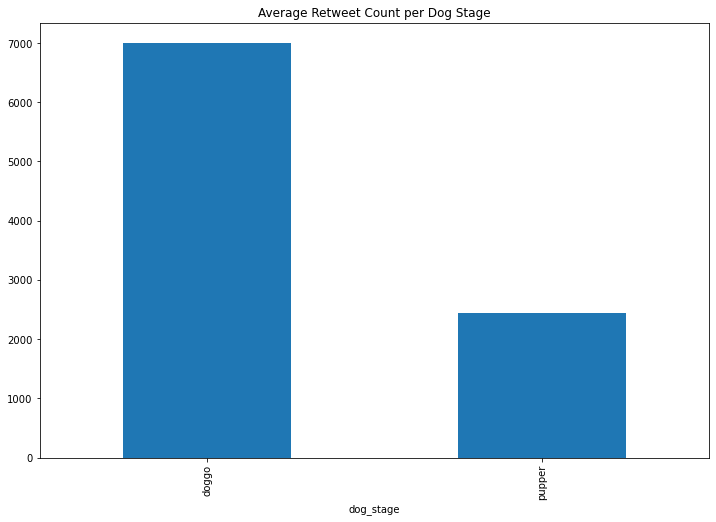

In [404]:
df_clean.query('dog_stage == "doggo" or dog_stage == "pupper"').groupby(['dog_stage'])['retweet_count'].mean().plot(kind = 'bar', x = 'retweet_count', figsize = (12,8), title = 'Average Retweet Count per Dog Stage');

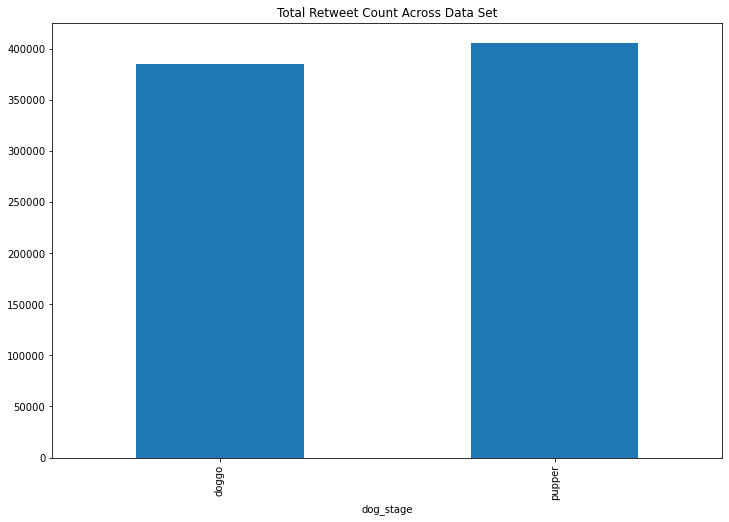

In [405]:
df_clean.query('dog_stage == "doggo" or dog_stage == "pupper"').groupby(['dog_stage'])['retweet_count'].sum().plot(kind = 'bar', x = 'retweet_count', figsize = (12,8), title = 'Total Retweet Count Across Data Set');

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<div style="border-top: 3px solid #eee; margin-top: 30px;  margin-bottom: 15px;">
    <p><strong>Student Comments:</strong></p>
    <p>I think the 2 visualizations above really drive to home just how much people prefer older dogs (<em>doggos</em>) to younger dogs (<em>puppers</em>) when you look at the bar chart of average retweets. The doggo bar is so much bigger than the pupper chart. Across the board amongst the values avaialble in the data set (the sum of retweets) the puppers had slightly more retweets in general and had the opportunity to surpass the doggos or at least get close to them in average value, but no such luck. The lag pretty far behind.</p>
</div>

<a href="#top" style="position: absolute; right: 15px;">Back to Top</a>
<a id="conclusion"></a>
<div style="border-top: 3px solid #eee; margin-top: 30px;">
    <h2>Project Wrap Up</h2>
    <h3>Student Comments:</h3>
    <p>The We Rate Dogs tweet archive provided the opportunity to combine and massage data from a few different sources all with varying levels of significance. During this process it became very clear just how iterative this process can be. It also provided a nice framework for understanding how to clean a data set methodically:</p>
    <ul>
        <li>reduce duplicates - not only across all available columns in the set, but more concentrated accross defining features for the observation.</li>
        <li>verify data types</li>
        <li>figure out a good way to look for and correct incorrect/corrupted data</li>
        <li>remove unfixable observations and fix fixable ones</li>
        <li>address structural issues as early as possible to help make the analysis easier/doable</li>
    </ul>
    <h3>Udacity Required Attachments</h3>
    <h4>Reporting for this Project:</h4>
    <p>Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.</p>
    <p>Attached: See - wrangle_report.pdf</p>
    <p>Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.</p>
    <p>Attached: See - act_report.pdf</p>
</div>

In [410]:
!jupyter nbconvert --to html wrangle_act.ipynb

[NbConvertApp] Converting notebook wrangle_act.ipynb to html
[NbConvertApp] Writing 933547 bytes to wrangle_act.html
